# Data Visualization Project : World Important Events

## Milestone 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
DATA = "dataset/World_Important_Dates.csv"

In [3]:
df = pd.read_csv(DATA, na_values='Unknown')
df.head()

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,1,Indus Valley Civilization Flourishes,NaN,NaN,2600 BC,India,Civilization,Indus Valley,Development of one of the world's earliest urb...,Local inhabitants,Indus Valley people,Positive
1,2,Battle of the Ten Kings,NaN,NaN,1400 BC,India,Battle,Punjab,Rigvedic tribes consolidated their control ove...,Rigvedic tribes,Sudas,Positive
2,6,Establishment of the Delhi Sultanate,NaN,NaN,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed
3,7,Battle of Panipat,21,April,1526,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed
4,8,Establishment of British Raj,1,May,1858,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative


In [4]:
df.describe()

,Sl. No
count,1096.000000
mean,581.784672
std,330.792389
min,1.000000
25%,301.500000
50%,585.500000
75%,865.250000
max,1151.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Sl. No                              1096 non-null   int64 
 1   Name of Incident                    1096 non-null   object
 2   Date                                669 non-null    object
 3   Month                               701 non-null    object
 4   Year                                1096 non-null   object
 5   Country                             1096 non-null   object
 6   Type of Event                       1096 non-null   object
 7   Place Name                          1076 non-null   object
 8   Impact                              1096 non-null   object
 9   Affected Population                 1096 non-null   object
 10  Important Person/Group Responsible  1040 non-null   object
 11  Outcome                             1096 non-null   obje

In [6]:
#transform the BC dates to negative
df['Year'] = df['Year'].apply(lambda x: "-" + x.split(' ')[0] if 'BC' in x else x)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,1,Indus Valley Civilization Flourishes,NaN,NaN,-2600.0,India,Civilization,Indus Valley,Development of one of the world's earliest urb...,Local inhabitants,Indus Valley people,Positive
1,2,Battle of the Ten Kings,NaN,NaN,-1400.0,India,Battle,Punjab,Rigvedic tribes consolidated their control ove...,Rigvedic tribes,Sudas,Positive
2,6,Establishment of the Delhi Sultanate,NaN,NaN,1206.0,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed
3,7,Battle of Panipat,21,April,1526.0,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed
4,8,Establishment of British Raj,1,May,1858.0,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1147,First Mexican Empire Declared,28,September,1821.0,Mexico,Political,Mexico,Brief establishment of an empire soon transiti...,Mexicans,Agustín de Iturbide,Positive
1092,1148,U.S.UnknownMexican War,25,April,1846.0,Mexico,Military,Northern Mexico,Loss of vast territories to the United States,Mexicans,US,Negative
1093,1149,Reform Wars,NaN,NaN,1857.0,Mexico,Civil War,Mexico,Liberal vs. Conservative conflict leading to c...,Mexicans,Benito Juárez,Mixed
1094,1150,French Intervention in Mexico,NaN,NaN,1862.0,Mexico,Military Intervention,Mexico,Establishment and fall of the Second Mexican E...,Mexicans,Napoleon III,Negative


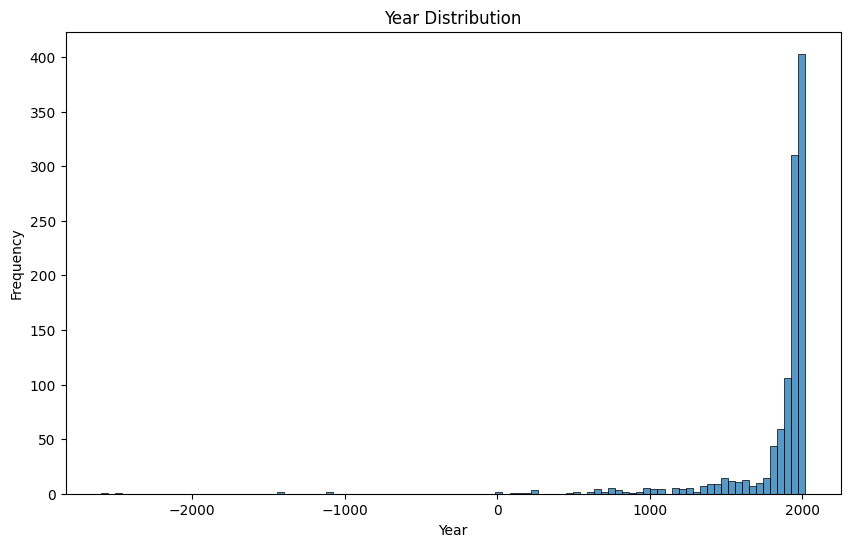

In [7]:
# year distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=100)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [8]:
# replace the country names
df['Country'] = df['Country'].replace('USA', 'United States of America')
df['Country'] = df['Country'].replace('UK', 'United Kingdom')
df['Country'] = df['Country'].replace('UAE', 'United Arab Emirates')
df['Country'] = df['Country'].replace('USSR', 'Russia')
df['Country'] = df['Country'].replace('Congo (DRC)', 'Dem. Rep. Congo')
df['Country'] = df['Country'].replace('Congo (Brazzaville)', 'Congo')
df['Country'] = df['Country'].replace('Tehran', 'Iran')
df['Country'] = df['Country'].replace("Ivory Coast (Côte d'Ivoire)", "Côte d'Ivoire")
df['Country'] = df['Country'].replace('Uzbek SSR', 'Uzbekistan')
df['Country'] = df['Country'].replace('Bukhara', 'Uzbekistan')
df['Country'] = df['Country'].replace('Samarkand', 'Uzbekistan')
df['Country'] = df['Country'].replace('Tashkent', 'Uzbekistan')
df['Country'] = df['Country'].replace('GuineaUnknownBissau', 'Guinea-Bissau')
df['Country'] = df['Country'].replace('Swaziland (Eswatini)', 'eSwatini')
df['Country'] = df['Country'].replace('Central African Republic', 'Central African Rep.')
df['Country'] = df['Country'].replace('Malacca', 'Malaysia')
df['Country'] = df['Country'].replace('South Sudan', 'S. Sudan')
df['Country'] = df['Country'].replace('Equatorial Guinea', 'Eq. Guinea')
df['Country'] = df['Country'].replace('Mosul', 'Iraq')
df['Country'] = df['Country'].replace('Basra', 'Iraq')
df['Country'] = df['Country'].replace('Zhanaozen', 'Kazakhstan')
df['Country'] = df['Country'].replace('Almaty', 'Kazakhstan')
df['Country'] = df['Country'].replace('Soviet Union', 'Russia')
df['Country'] = df['Country'].replace('England', 'United Kingdom')
df['Country'] = df['Country'].replace('Persia', 'Iran')

In [9]:
countries_freq = df['Country'].value_counts()

In [10]:
countries_freq_df = countries_freq.reset_index()
countries_freq_df.columns = ['Country', 'Frequency']

/var/folders/z3/144384y17rz3t01jn89xby0c0000gn/T/ipykernel_70422/1244559303.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


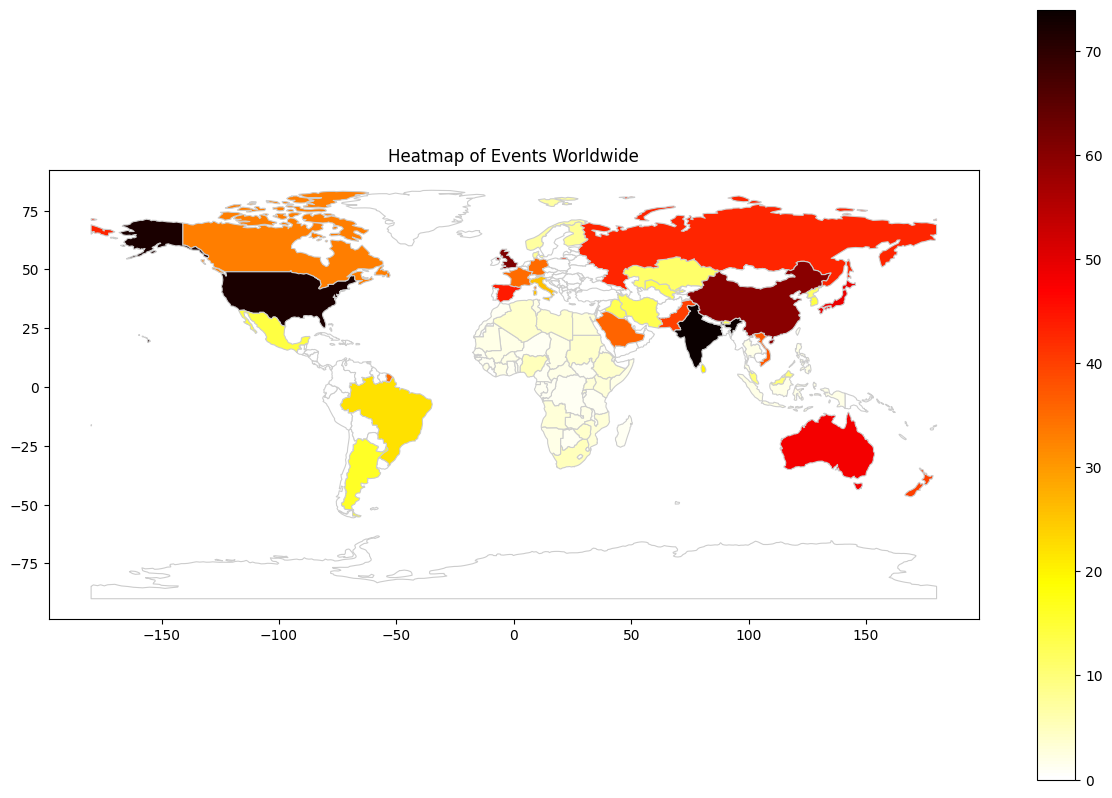

In [11]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

all_countries = pd.DataFrame({'Country': world['name']})
all_countries_freq = all_countries.merge(countries_freq_df, how='left', on='Country')
all_countries_freq['Frequency'] = all_countries_freq['Frequency'].fillna(0)

# Merge world map with event data
world = world.merge(all_countries_freq, how='left', left_on='name', right_on='Country')

# Plot heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Frequency', cmap='hot_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Heatmap of Events Worldwide')
plt.show()

In [50]:
#distribution of outcomes
outcomes_freq = df['Outcome'].value_counts()

outcomes_freq_df = outcomes_freq.reset_index()
outcomes_freq_df.columns = ['Outcome', 'Frequency']

outcomes_freq_df

,Outcome,Frequency
0,Positive,588
1,Negative,304
2,Mixed,202
3,Ongoing,1


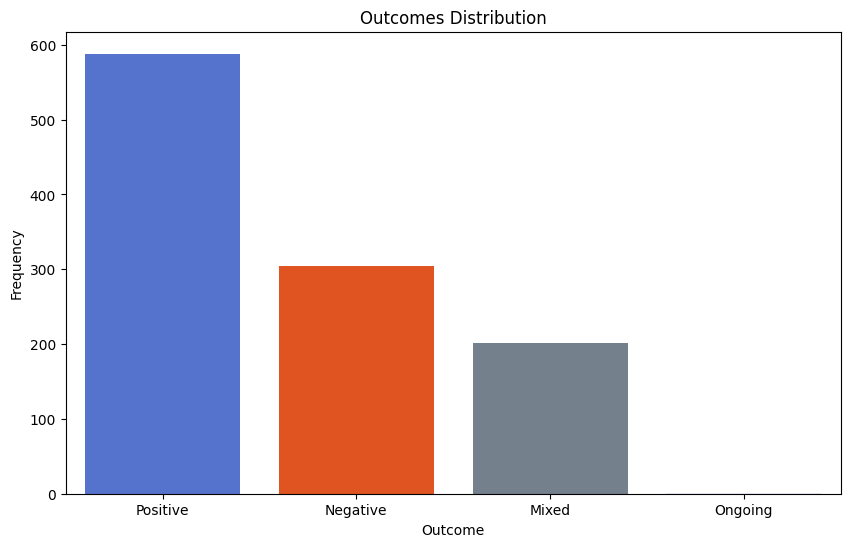

In [64]:
# Plot outcomes distribution
plt.figure(figsize=(10, 6))

custom_palette = {'Positive': 'royalblue', 'Negative': 'orangered', 'Mixed': 'slategray', 'Ongoing': 'lavender'}

sns.barplot(x='Outcome', y='Frequency', data=outcomes_freq_df, palette=custom_palette,hue='Outcome', legend=False)
plt.title('Outcomes Distribution')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()